# An example of the Data structure 
The data structure is used for sampling from an unnormalized categorical distribution and updating the distribution.

import the class

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from TreeSampler import Tree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize a tree object

In [25]:
N = 1e5 ## Number of leaves, i.e., the number of categories (or datapoints in our work)
Weight = Tree(N) # The leafs are initialized to 1

**Initializing the sampling probability of node i proportional to i** 

In [92]:
vals = list(range(int(N)))
Weight.initialize(vals)

In [72]:
samples = [Weight.sample()[0] for _ in range(100000)]

Text(0, 0.5, 'Sampling Probability')

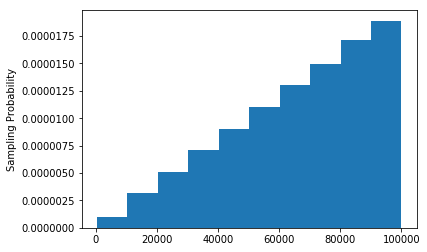

In [73]:
plt.hist(samples,density=True);
plt.ylabel('Sampling Probability')

**searching for a node=i with value=v such that \sum_{j=1}^i node.v <= v <= **

In [111]:
#n = 10
#Weight = Tree(n)
#vals = list(range(int(n)))
#Weight.initialize(vals)

In [119]:
node = Weight.find(1.5)
node.v

2

In [116]:
for i in range(n):
    node = Weight.find_id(i)
    print(node.node_id, node.v)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


## Comparing the running time with the numpy implementation with 10000 samples

**Tree structure**

In [69]:
vals = list(range(int(N)))
Weight.initialize(vals)

In [70]:
%%timeit
for _ in range(10000):
    node = Weight.find_id(2)
    Weight.update(node,node.v*(1+1e-4) )
    Weight.sample()[0]

513 ms ± 9.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**numpy sampler**

In [67]:
elements = list(range(int(N)))
vals = np.arange(int(N))
sum_vals = np.sum(vals)
prob = vals / sum_vals

In [68]:
%%timeit
sum_vals = np.sum(vals)
prob = vals / sum_vals
for i in range(10000):
    old_val = vals[2]
    vals[2] *= (1+1e-4)
    sum_vals += vals[2] - old_val
    prob = vals / sum_vals
    np.random.choice(elements, size = 1, replace=True, p=prob)

2min 1s ± 10.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
